In [74]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [75]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

# Nway run in photometric prior mode

    adding angular separation columns
matching:      2 matches after filtering by search radius
Primary catalogue "EROSITA" (1), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (1), density gives 2.13e+07 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 1/1 [00:00<00:00, 778.31it/s]
Incorporating bias "DESI:nnmag1" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag1"


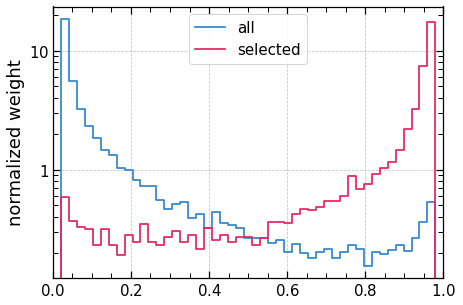


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [76]:
magnitude_columns = [
                    ('nnmag_grzw1w2w3w4', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2w3w4.csv'),
                    ]

ero_table = {'name': 'EROSITA',
 'ra': np.array([159.4345944 ]),
 'dec': np.array([57.19878827]),
 'error': np.array([0.80268249]),
 'area': 18.38577641540713/9500,
 'mags': [],
 'maghists': [],
 'magnames': []}



desi_table = {'name': 'DESI',
 'ra': np.array([159.4345944+5/60/60 ]),
 'dec': np.array([57.19878827+5/60/60]),
 'error': np.array([0.1]),
 'area': 18.38577641540713/9500,
 'mags': [np.array([0.9])],
    'maghists': [(np.array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
          0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
          0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
          0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
          0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
          0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
          0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
          0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
          0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
          0.91836735, 0.93877551, 0.95918367, 0.97959184]),
   np.array([0.02040816, 0.04081633, 0.06122449, 0.08163265, 0.10204082,
          0.12244898, 0.14285714, 0.16326531, 0.18367347, 0.20408163,
          0.2244898 , 0.24489796, 0.26530612, 0.28571429, 0.30612245,
          0.32653061, 0.34693878, 0.36734694, 0.3877551 , 0.40816327,
          0.42857143, 0.44897959, 0.46938776, 0.48979592, 0.51020408,
          0.53061224, 0.55102041, 0.57142857, 0.59183673, 0.6122449 ,
          0.63265306, 0.65306122, 0.67346939, 0.69387755, 0.71428571,
          0.73469388, 0.75510204, 0.7755102 , 0.79591837, 0.81632653,
          0.83673469, 0.85714286, 0.87755102, 0.89795918, 0.91836735,
          0.93877551, 0.95918367, 0.97959184, 1.        ]),
   np.array([ 0.        ,  0.58657899,  0.37177542,  0.33046704,  0.31394369,
           0.23132693,  0.31394369,  0.23132693,  0.19001855,  0.28089698,
           0.24785028,  0.34699039,  0.24785028,  0.23132693,  0.27263531,
           0.30568201,  0.24785028,  0.28089698,  0.21480357,  0.32220536,
           0.25611195,  0.28089698,  0.24785028,  0.27263531,  0.27263531,
           0.23132693,  0.26437363,  0.36351374,  0.36351374,  0.35525207,
           0.42134547,  0.47091553,  0.45439218,  0.48743888,  0.54527061,
           0.54527061,  0.60310234,  0.88399933,  0.6857191 ,  0.76007419,
           0.92530771,  1.04097117,  1.16489631,  1.47057832,  2.18934412,
           3.22205362,  7.39419997, 17.25864104,  0.        ]),
   np.array([ 0.        , 18.48338369,  5.59365559,  3.25327291,  2.32980866,
           1.82578046,  1.46273917,  1.33585096,  1.03977845,  1.00100705,
           0.8141994 ,  0.73313192,  0.72608258,  0.55689829,  0.46878147,
           0.51107754,  0.53222558,  0.39123867,  0.42296073,  0.32426989,
           0.43705942,  0.35599194,  0.34541793,  0.32426989,  0.26787513,
           0.26435045,  0.26435045,  0.24320242,  0.25730111,  0.20443102,
           0.23615307,  0.19738167,  0.17975831,  0.20443102,  0.21500504,
           0.17975831,  0.20443102,  0.2326284 ,  0.21500504,  0.1550856 ,
           0.20443102,  0.193857  ,  0.21148036,  0.2326284 ,  0.20795569,
           0.26787513,  0.35951662,  0.53222558,  0.        ]))],
 'magnames': ['nnmag1']}
 

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}



nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

nway_res_ero_test1 = nway_res_ero.iloc[1]

    adding angular separation columns
matching:      2 matches after filtering by search radius
Primary catalogue "EROSITA" (1), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (1), density gives 2.13e+07 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 1/1 [00:00<00:00, 915.19it/s]
Incorporating bias "DESI:nnmag1" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag1"


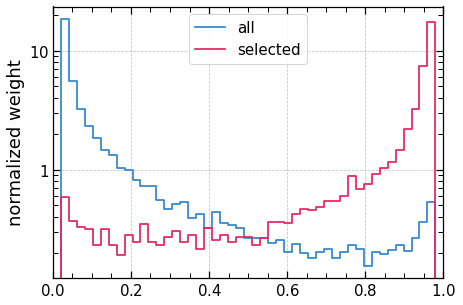


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [77]:
magnitude_columns = [
                    ('nnmag_grzw1w2w3w4', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2w3w4.csv'),
                    ]

ero_table = {'name': 'EROSITA',
 'ra': np.array([159.4345944 ]),
 'dec': np.array([57.19878827]),
 'error': np.array([0.80268249]),
 'area': 18.38577641540713/9500,
 'mags': [],
 'maghists': [],
 'magnames': []}



desi_table = {'name': 'DESI',
 'ra': np.array([159.4345944+5/60/60 ]),
 'dec': np.array([57.19878827+5/60/60]),
 'error': np.array([0.1]),
 'area': 18.38577641540713/9500,
 'mags': [np.array([-99.0])],
    'maghists': [(np.array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
          0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
          0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
          0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
          0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
          0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
          0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
          0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
          0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
          0.91836735, 0.93877551, 0.95918367, 0.97959184]),
   np.array([0.02040816, 0.04081633, 0.06122449, 0.08163265, 0.10204082,
          0.12244898, 0.14285714, 0.16326531, 0.18367347, 0.20408163,
          0.2244898 , 0.24489796, 0.26530612, 0.28571429, 0.30612245,
          0.32653061, 0.34693878, 0.36734694, 0.3877551 , 0.40816327,
          0.42857143, 0.44897959, 0.46938776, 0.48979592, 0.51020408,
          0.53061224, 0.55102041, 0.57142857, 0.59183673, 0.6122449 ,
          0.63265306, 0.65306122, 0.67346939, 0.69387755, 0.71428571,
          0.73469388, 0.75510204, 0.7755102 , 0.79591837, 0.81632653,
          0.83673469, 0.85714286, 0.87755102, 0.89795918, 0.91836735,
          0.93877551, 0.95918367, 0.97959184, 1.        ]),
   np.array([ 0.        ,  0.58657899,  0.37177542,  0.33046704,  0.31394369,
           0.23132693,  0.31394369,  0.23132693,  0.19001855,  0.28089698,
           0.24785028,  0.34699039,  0.24785028,  0.23132693,  0.27263531,
           0.30568201,  0.24785028,  0.28089698,  0.21480357,  0.32220536,
           0.25611195,  0.28089698,  0.24785028,  0.27263531,  0.27263531,
           0.23132693,  0.26437363,  0.36351374,  0.36351374,  0.35525207,
           0.42134547,  0.47091553,  0.45439218,  0.48743888,  0.54527061,
           0.54527061,  0.60310234,  0.88399933,  0.6857191 ,  0.76007419,
           0.92530771,  1.04097117,  1.16489631,  1.47057832,  2.18934412,
           3.22205362,  7.39419997, 17.25864104,  0.        ]),
   np.array([ 0.        , 18.48338369,  5.59365559,  3.25327291,  2.32980866,
           1.82578046,  1.46273917,  1.33585096,  1.03977845,  1.00100705,
           0.8141994 ,  0.73313192,  0.72608258,  0.55689829,  0.46878147,
           0.51107754,  0.53222558,  0.39123867,  0.42296073,  0.32426989,
           0.43705942,  0.35599194,  0.34541793,  0.32426989,  0.26787513,
           0.26435045,  0.26435045,  0.24320242,  0.25730111,  0.20443102,
           0.23615307,  0.19738167,  0.17975831,  0.20443102,  0.21500504,
           0.17975831,  0.20443102,  0.2326284 ,  0.21500504,  0.1550856 ,
           0.20443102,  0.193857  ,  0.21148036,  0.2326284 ,  0.20795569,
           0.26787513,  0.35951662,  0.53222558,  0.        ]))],
 'magnames': ['nnmag1']}
 

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}



nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

nway_res_ero_test2 = nway_res_ero.iloc[1]


In [78]:
magnitude_columns = [
                    ('nnmag_grzw1w2w3w4', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2w3w4.csv'),
                    ]

ero_table = {'name': 'EROSITA',
 'ra': np.array([159.4345944 ]),
 'dec': np.array([57.19878827]),
 'error': np.array([0.80268249]),
 'area': 18.38577641540713/9500,
 'mags': [],
 'maghists': [],
 'magnames': []}



desi_table = {'name': 'DESI',
 'ra': np.array([159.4345944+5/60/60 ]),
 'dec': np.array([57.19878827+5/60/60]),
 'error': np.array([0.1]),
 'area': 18.38577641540713/9500,
  'mags': [],
 'maghists': [],
 'magnames': []}
 

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}



nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

nway_res_ero_test3 = nway_res_ero.iloc[1]

    adding angular separation columns
matching:      2 matches after filtering by search radius
Primary catalogue "EROSITA" (1), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (1), density gives 2.13e+07 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 1/1 [00:00<00:00, 540.16it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


    adding angular separation columns
matching:      2 matches after filtering by search radius
Primary catalogue "EROSITA" (1), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (1), density gives 2.13e+07 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 1/1 [00:00<00:00, 1091.70it/s]
Incorporating bias "DESI:nnmag1" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag1"


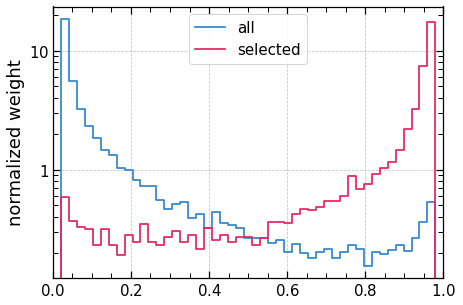

Incorporating bias "DESI:nnmag2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag2"


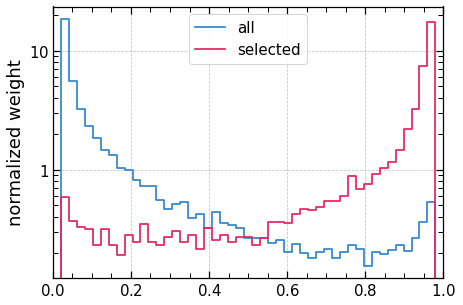


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [79]:
magnitude_columns = [
                    ('nnmag_grzw1w2w3w4', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2w3w4.csv'),
                    ]

ero_table = {'name': 'EROSITA',
 'ra': np.array([159.4345944 ]),
 'dec': np.array([57.19878827]),
 'error': np.array([0.80268249]),
 'area': 18.38577641540713/9500,
 'mags': [],
 'maghists': [],
 'magnames': []}



desi_table = {'name': 'DESI',
 'ra': np.array([159.4345944+5/60/60 ]),
 'dec': np.array([57.19878827+5/60/60]),
 'error': np.array([0.1]),
 'area': 18.38577641540713/9500,
 'mags': [np.array([0.9]), np.array([0.9])],
    'maghists': [(np.array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
          0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
          0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
          0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
          0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
          0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
          0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
          0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
          0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
          0.91836735, 0.93877551, 0.95918367, 0.97959184]),
   np.array([0.02040816, 0.04081633, 0.06122449, 0.08163265, 0.10204082,
          0.12244898, 0.14285714, 0.16326531, 0.18367347, 0.20408163,
          0.2244898 , 0.24489796, 0.26530612, 0.28571429, 0.30612245,
          0.32653061, 0.34693878, 0.36734694, 0.3877551 , 0.40816327,
          0.42857143, 0.44897959, 0.46938776, 0.48979592, 0.51020408,
          0.53061224, 0.55102041, 0.57142857, 0.59183673, 0.6122449 ,
          0.63265306, 0.65306122, 0.67346939, 0.69387755, 0.71428571,
          0.73469388, 0.75510204, 0.7755102 , 0.79591837, 0.81632653,
          0.83673469, 0.85714286, 0.87755102, 0.89795918, 0.91836735,
          0.93877551, 0.95918367, 0.97959184, 1.        ]),
   np.array([ 0.        ,  0.58657899,  0.37177542,  0.33046704,  0.31394369,
           0.23132693,  0.31394369,  0.23132693,  0.19001855,  0.28089698,
           0.24785028,  0.34699039,  0.24785028,  0.23132693,  0.27263531,
           0.30568201,  0.24785028,  0.28089698,  0.21480357,  0.32220536,
           0.25611195,  0.28089698,  0.24785028,  0.27263531,  0.27263531,
           0.23132693,  0.26437363,  0.36351374,  0.36351374,  0.35525207,
           0.42134547,  0.47091553,  0.45439218,  0.48743888,  0.54527061,
           0.54527061,  0.60310234,  0.88399933,  0.6857191 ,  0.76007419,
           0.92530771,  1.04097117,  1.16489631,  1.47057832,  2.18934412,
           3.22205362,  7.39419997, 17.25864104,  0.        ]),
   np.array([ 0.        , 18.48338369,  5.59365559,  3.25327291,  2.32980866,
           1.82578046,  1.46273917,  1.33585096,  1.03977845,  1.00100705,
           0.8141994 ,  0.73313192,  0.72608258,  0.55689829,  0.46878147,
           0.51107754,  0.53222558,  0.39123867,  0.42296073,  0.32426989,
           0.43705942,  0.35599194,  0.34541793,  0.32426989,  0.26787513,
           0.26435045,  0.26435045,  0.24320242,  0.25730111,  0.20443102,
           0.23615307,  0.19738167,  0.17975831,  0.20443102,  0.21500504,
           0.17975831,  0.20443102,  0.2326284 ,  0.21500504,  0.1550856 ,
           0.20443102,  0.193857  ,  0.21148036,  0.2326284 ,  0.20795569,
           0.26787513,  0.35951662,  0.53222558,  0.        ]), ), (np.array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
          0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
          0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
          0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
          0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
          0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
          0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
          0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
          0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
          0.91836735, 0.93877551, 0.95918367, 0.97959184]),
   np.array([0.02040816, 0.04081633, 0.06122449, 0.08163265, 0.10204082,
          0.12244898, 0.14285714, 0.16326531, 0.18367347, 0.20408163,
          0.2244898 , 0.24489796, 0.26530612, 0.28571429, 0.30612245,
          0.32653061, 0.34693878, 0.36734694, 0.3877551 , 0.40816327,
          0.42857143, 0.44897959, 0.46938776, 0.48979592, 0.51020408,
          0.53061224, 0.55102041, 0.57142857, 0.59183673, 0.6122449 ,
          0.63265306, 0.65306122, 0.67346939, 0.69387755, 0.71428571,
          0.73469388, 0.75510204, 0.7755102 , 0.79591837, 0.81632653,
          0.83673469, 0.85714286, 0.87755102, 0.89795918, 0.91836735,
          0.93877551, 0.95918367, 0.97959184, 1.        ]),
   np.array([ 0.        ,  0.58657899,  0.37177542,  0.33046704,  0.31394369,
           0.23132693,  0.31394369,  0.23132693,  0.19001855,  0.28089698,
           0.24785028,  0.34699039,  0.24785028,  0.23132693,  0.27263531,
           0.30568201,  0.24785028,  0.28089698,  0.21480357,  0.32220536,
           0.25611195,  0.28089698,  0.24785028,  0.27263531,  0.27263531,
           0.23132693,  0.26437363,  0.36351374,  0.36351374,  0.35525207,
           0.42134547,  0.47091553,  0.45439218,  0.48743888,  0.54527061,
           0.54527061,  0.60310234,  0.88399933,  0.6857191 ,  0.76007419,
           0.92530771,  1.04097117,  1.16489631,  1.47057832,  2.18934412,
           3.22205362,  7.39419997, 17.25864104,  0.        ]),
   np.array([ 0.        , 18.48338369,  5.59365559,  3.25327291,  2.32980866,
           1.82578046,  1.46273917,  1.33585096,  1.03977845,  1.00100705,
           0.8141994 ,  0.73313192,  0.72608258,  0.55689829,  0.46878147,
           0.51107754,  0.53222558,  0.39123867,  0.42296073,  0.32426989,
           0.43705942,  0.35599194,  0.34541793,  0.32426989,  0.26787513,
           0.26435045,  0.26435045,  0.24320242,  0.25730111,  0.20443102,
           0.23615307,  0.19738167,  0.17975831,  0.20443102,  0.21500504,
           0.17975831,  0.20443102,  0.2326284 ,  0.21500504,  0.1550856 ,
           0.20443102,  0.193857  ,  0.21148036,  0.2326284 ,  0.20795569,
           0.26787513,  0.35951662,  0.53222558,  0.        ]), )],
 'magnames': ['nnmag1', 'nnmag2']}
 

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}



nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

nway_res_ero_test4 = nway_res_ero.iloc[1]


In [80]:
pd.concat([nway_res_ero_test1, nway_res_ero_test2, nway_res_ero_test3, nway_res_ero_test4], axis=1)
#first - uses one mag value (0.9)
#second - uses -99 mag value
#third - uses only distance 
#fourth - two mags (0.9, 0.9) - accidentaly -> increases confidence significantly

,1,1,1,1
EROSITA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DESI,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Separation_EROSITA_DESI,5.686510e+00,5.686510e+00,5.686510e+00,5.686510e+00
Separation_max,5.686510e+00,5.686510e+00,5.686510e+00,5.686510e+00
ncat,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
dist_bayesfactor_uncorrected,3.823770e-01,3.823770e-01,3.823770e-01,3.823770e-01
dist_bayesfactor,3.823770e-01,3.823770e-01,3.823770e-01,3.823770e-01
dist_post,5.657835e-08,5.657835e-08,5.657835e-08,5.657835e-08
bias_DESI_nnmag1,1.052794e+01,1.000000e+00,NaN,1.052794e+01
p_single,5.956529e-07,5.657835e-08,5.657835e-08,6.270960e-06
